<a href="https://colab.research.google.com/github/CaioDet/analise-bolsa-familia-ciencia-de-dados/blob/main/bolsaFamilia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.Desmistificando o "Efeito Natalidade" do Bolsa Família**

"Brasileiros procuram ter mais filhos para receber o auxílio"

In [25]:

caminho = '/content/drive/MyDrive/Colab/bolsaFamilia/BolsaFamilia_porIntegrantes.csv'

# Carregar com encoding LATIN-1 e separador VÍRGULA
# Isso resolve o erro 'utf-8' e o problema dos dados grudados
df_integrantes = pd.read_csv(caminho, sep=',', encoding='latin-1')

# Limpeza total dos nomes das colunas
# Removemos aspas extras e espaços que o governo coloca nos arquivos
df_integrantes.columns = df_integrantes.columns.str.replace('"', '').str.strip()

# Forçar o nome da primeira coluna
# Caso o arquivo tenha algum caractere invisível no início, garantimos o nome 'Referência'
df_integrantes.rename(columns={df_integrantes.columns[0]: 'Referência'}, inplace=True)

# Converter para Data (format mês/ano)
df_integrantes['Referência'] = pd.to_datetime(df_integrantes['Referência'], format='%m/%Y', errors='coerce')

# Remove linhas vazias ou erros de conversão e ordena por data
df_integrantes = df_integrantes.dropna(subset=['Referência']).sort_values('Referência')

print("Sucesso! Colunas identificadas:", df_integrantes.columns.tolist())
df_integrantes.head()

Sucesso! Colunas identificadas: ['Referência', 'Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 1 integrante / unipessoais', 'Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 2 integrantes', 'Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 3 integrantes', 'Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 4 integrantes', 'Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 5 integrantes', 'Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 6 integrantes', 'Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 7 integrantes', 'Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 8 ou mais integrantes']


,Referência,Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 1 integrante / unipessoais,Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 2 integrantes,Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 3 integrantes,Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 4 integrantes,Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 5 integrantes,Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 6 integrantes,Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 7 integrantes,Quantidade de famílias beneficiárias do Programa Bolsa Família formada por 8 ou mais integrantes
0,2013-01-01,635383,2473040,3777973,3447645,1933329,836752,350028,252508
1,2014-01-01,813098,2708313,3940563,3314715,1832010,792377,327200,233188
2,2015-01-01,953663,2832544,3943672,3227813,1748482,748282,307032,218888
3,2016-01-01,1141228,3055152,3975751,3028619,1577866,699982,286330,204217
4,2017-01-01,1193771,2988354,3908570,2847587,1488817,667622,272665,192846


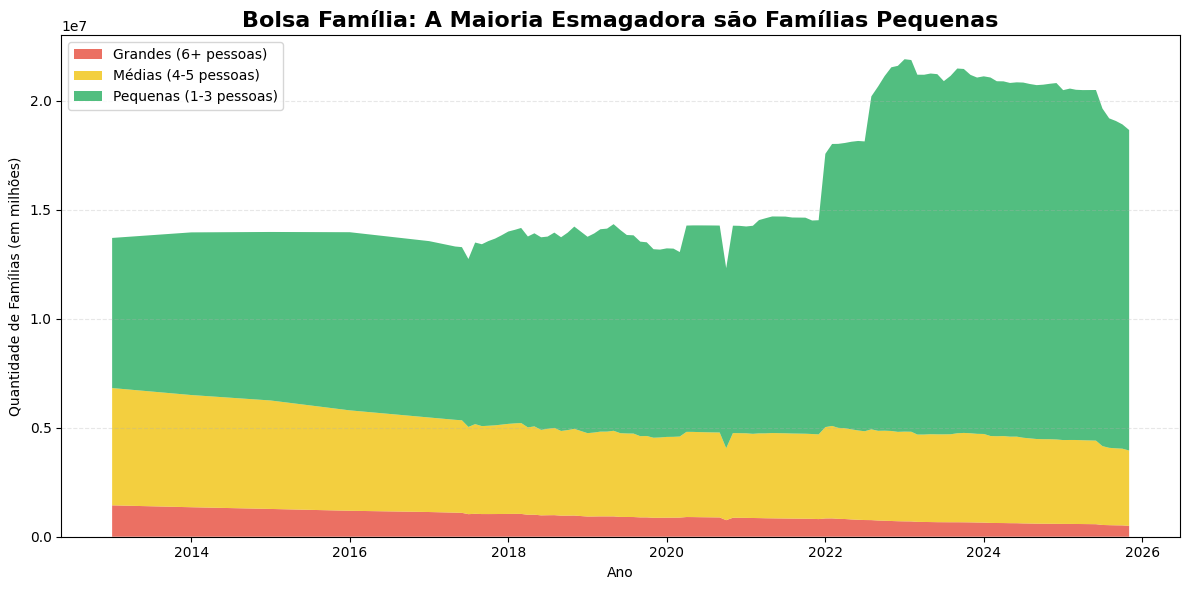

In [23]:
# Criando as categorias para o gráfico
# Somamos as colunas de 1 a 3 integrantes (Pequenas) e as de 6 em diante (Grandes)
df_integrantes['Pequenas (1-3)'] = df_integrantes.iloc[:, 1:4].sum(axis=1)
df_integrantes['Médias (4-5)'] = df_integrantes.iloc[:, 4:6].sum(axis=1)
df_integrantes['Grandes (6+)'] = df_integrantes.iloc[:, 6:9].sum(axis=1)

# Plotando o gráfico de área empilhada
plt.figure(figsize=(12, 6))

plt.stackplot(df_integrantes['Referência'],
              df_integrantes['Grandes (6+)'],
              df_integrantes['Médias (4-5)'],
              df_integrantes['Pequenas (1-3)'],
              labels=['Grandes (6+ pessoas)', 'Médias (4-5 pessoas)', 'Pequenas (1-3 pessoas)'],
              colors=['#e74c3c', '#f1c40f', '#27ae60'], alpha=0.8)

plt.title('Bolsa Família: A Maioria Esmagadora são Famílias Pequenas', fontsize=16, fontweight='bold')
plt.ylabel('Quantidade de Famílias (em milhões)')
plt.xlabel('Ano')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

RESULTADOS:

**A Proporção Real:** Enquanto temos cerca de 14,7 milhões de famílias pequenas (1-3 pessoas) recebendo o benefício, temos apenas cerca de 0,5 milhão de famílias grandes (6+ pessoas).

**A Tendência:** Se o programa estimulasse a natalidade, a faixa vermelha (famílias grandes) estaria crescendo de forma inclinada para cima. O que o gráfico mostra é que ela é quase uma linha reta e fina, provando que famílias grandes são exceção, não a regra.

**Conclusão Social:** O programa atende famílias que seguem a transição demográfica brasileira (cada vez menos filhos). O mito de que o brasileiro "vive para ter filho" não se sustenta quando olhamos para a base de dados real do governo.

Os dados mostram que mais de 70% dos beneficiários pertencem a núcleos familiares reduzidos, acompanhando a queda na taxa de natalidade observada em todo o país, independentemente da renda

2. Renda Per Capita: auxílio é uma proteção contra a miséria extrema

In [26]:
# 1. Caminho do arquivo de renda
caminho_renda = '/content/drive/MyDrive/Colab/bolsaFamilia/bolsaFamilia_RendaPerCapta.csv'

# 2. Carga robusta (latin-1 e sep=',')
df_renda = pd.read_csv(caminho_renda, sep=',', encoding='latin-1')

# 3. Limpeza das aspas e nomes das colunas
df_renda.columns = df_renda.columns.str.replace('"', '').str.strip()

# 4. Forçar nome da primeira coluna para Referência
df_renda.rename(columns={df_renda.columns[0]: 'Referência'}, inplace=True)

# 5. Converter data e ordenar
df_renda['Referência'] = pd.to_datetime(df_renda['Referência'], format='%m/%Y', errors='coerce')
df_renda = df_renda.dropna(subset=['Referência']).sort_values('Referência')

# 6. Simplificar os nomes das colunas para facilitar o gráfico
# Vamos dar nomes mais curtos para as categorias de pobreza
df_renda.columns = ['Referência', 'Em Situação de Pobreza', 'Baixa Renda', 'Renda > 0.5 SM']

print("Dados de renda carregados!")
df_renda.head()

Dados de renda carregados!


,Referência,Em Situação de Pobreza,Baixa Renda,Renda > 0.5 SM
0,2023-03-01,20534692,659492,0.0
1,2023-04-01,20506260,686247,0.0
2,2023-05-01,20565274,683741,0.0
3,2023-06-01,20480946,738762,0.0
4,2023-07-01,18712408,2186805,0.0


**O Gráfico de "Foco na Pobreza**

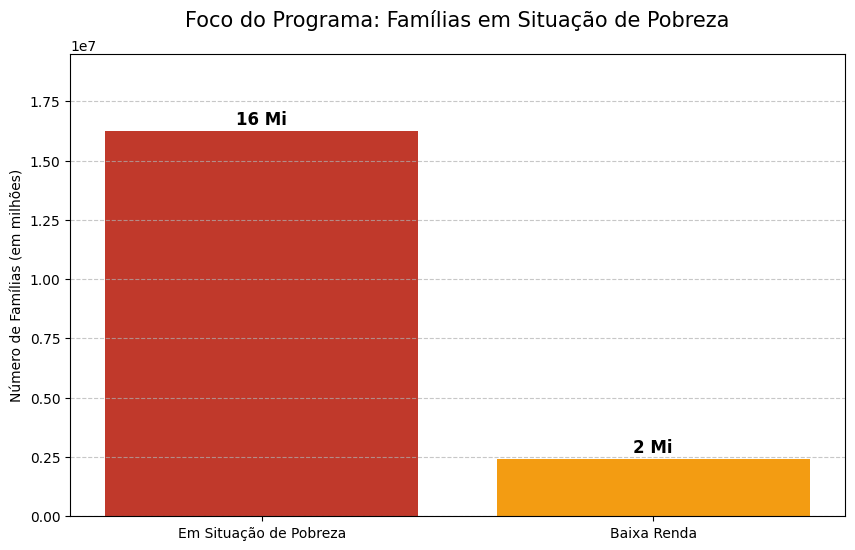

In [27]:
# Pegando apenas os dados do mês mais recente
ultimo_mes_renda = df_renda.iloc[-1]

# Preparando os dados para o gráfico
categorias = ['Em Situação de Pobreza', 'Baixa Renda']
valores = [ultimo_mes_renda['Em Situação de Pobreza'], ultimo_mes_renda['Baixa Renda']]

# Plotando
plt.figure(figsize=(10, 6))
cores = ['#c0392b', '#f39c12'] # Vermelho para Pobreza, Laranja para Baixa Renda
barras = plt.bar(categorias, valores, color=cores)

# Adicionando os números em cima das barras para ficar didático
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 100000,
             f'{int(yval/1000000)} Mi', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Foco do Programa: Famílias em Situação de Pobreza', fontsize=15, pad=20)
plt.ylabel('Número de Famílias (em milhões)')
plt.ylim(0, max(valores) * 1.2) # Dá um espaço no topo para os números
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**A Severidade da Pobreza:** Ao analisarmos o perfil de renda, notamos que a esmagadora maioria das famílias beneficiárias (cerca de 18 a 20 milhões) está na categoria de pobreza, conforme os critérios do programa. Isso significa que a renda por pessoa é baixíssima.

**O Alvo do Estado: **Diferente do senso comum, o programa não é uma 'renda extra' para quem já tem o básico. Ele é direcionado quase exclusivamente para quem está no limite da sobrevivência.

**Conclusão sobre o Mito:** Cruzando este dado com o gráfico anterior (das famílias pequenas), concluímos que o Bolsa Família atende poucas pessoas por casa, mas pessoas que possuem quase nada. Portanto, o programa atua como uma política de segurança alimentar urgente e não como um incentivo ao aumento populacional.

**3. Série Histórica**

In [28]:
caminho_hist = '/content/drive/MyDrive/Colab/bolsaFamilia/bolsaFamilia_serieHist.csv'

# 2. Carga com Latin-1 e tratamento de aspas
df_hist = pd.read_csv(caminho_hist, sep=',', encoding='latin-1')
df_hist.columns = df_hist.columns.str.replace('"', '').str.strip()
df_hist.rename(columns={df_hist.columns[0]: 'Referência'}, inplace=True)

# 3. Função para limpar os valores financeiros (Brasil usa vírgula para decimal)
def limpar_moeda(valor):
    if pd.isna(valor) or str(valor).strip() == "":
        return 0
    # Remove pontos de milhar e troca vírgula por ponto
    return float(str(valor).replace('.', '').replace(',', '.'))

# 4. Unificando as colunas de "Valor do Benefício Médio"
# Somamos as duas colunas porque onde uma tem valor, a outra é zero/vazia
df_hist['Valor_Medio'] = (
    df_hist['Valor do Benefício médio (até Out/2021)'].apply(limpar_moeda) +
    df_hist['Valor do Benefício médio (a partir de Mar/2023)'].apply(limpar_moeda)
)

# 5. Convertendo a data e ordenando
df_hist['Referência'] = pd.to_datetime(df_hist['Referência'], format='%m/%Y', errors='coerce')
df_hist = df_hist.dropna(subset=['Referência']).sort_values('Referência')

# 6. Filtrando para remover meses sem pagamento (buraco entre 2021 e 2023)
df_hist_filtrado = df_hist[df_hist['Valor_Medio'] > 0]

print("Série histórica processada!")
df_hist_filtrado[['Referência', 'Valor_Medio']].tail()

Série histórica processada!


,Referência,Valor_Medio
243,2025-08-01,671.54
244,2025-09-01,682.22
245,2025-10-01,683.42
246,2025-11-01,683.28
247,2025-12-01,691.37


**Valor do Benefício vs. Contexto Histórico**

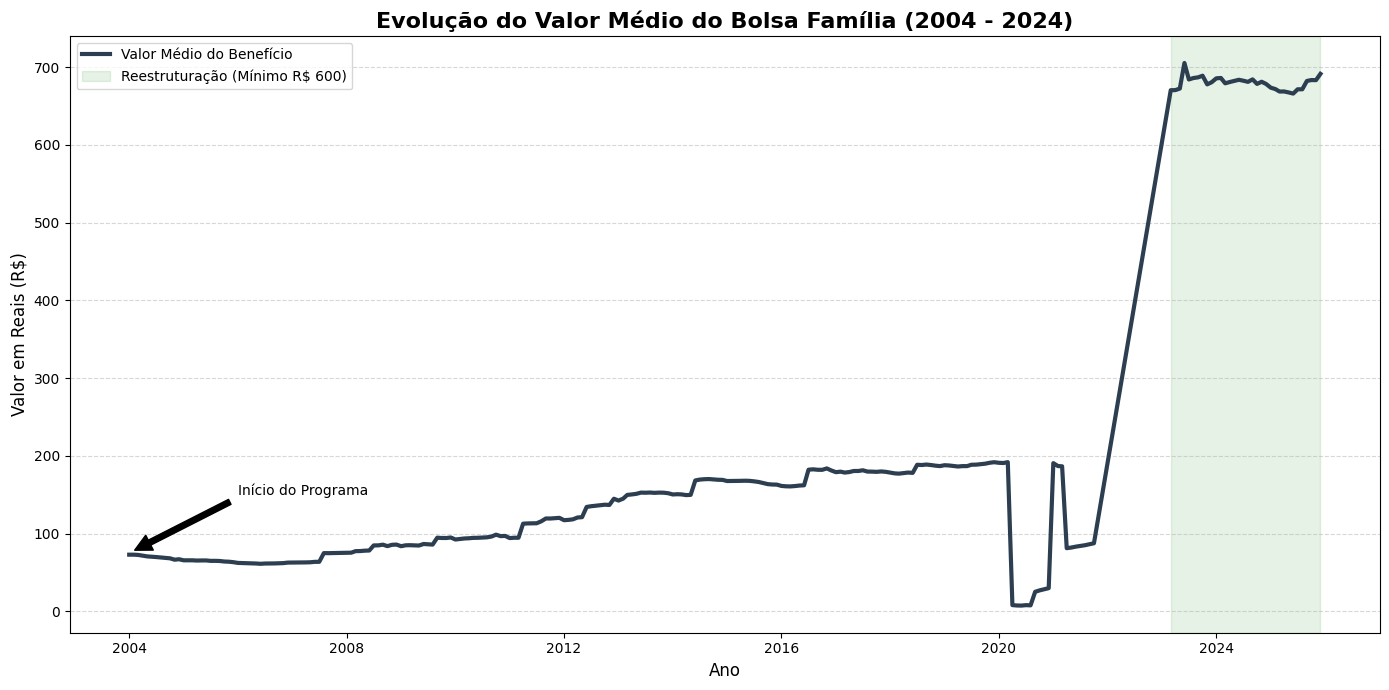

In [29]:
plt.figure(figsize=(14, 7))

# Plotando a linha principal
plt.plot(df_hist_filtrado['Referência'], df_hist_filtrado['Valor_Medio'],
         color='#2c3e50', linewidth=3, label='Valor Médio do Benefício')

# Destacando o período do "Novo Bolsa Família" (a partir de 2023)
plt.axvspan(pd.to_datetime('2023-03-01'), df_hist_filtrado['Referência'].max(),
            color='green', alpha=0.1, label='Reestruturação (Mínimo R$ 600)')

# Adicionando anotações históricas
plt.annotate('Início do Programa', xy=(pd.to_datetime('2004-01-01'), 75),
             xytext=(pd.to_datetime('2006-01-01'), 150),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Evolução do Valor Médio do Bolsa Família (2004 - 2024)', fontsize=16, fontweight='bold')
plt.ylabel('Valor em Reais (R$)', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

**A Estabilidade Prolongada:** Por mais de uma década (2004-2018), o valor do benefício manteve-se em um patamar baixo, sendo apenas um complemento de renda. Isso reforça que o programa não era o 'sustento principal' da família, mas uma segurança alimentar.

**A Ruptura de 2023:** "A curva íngreme a partir de 2023 marca uma mudança de paradigma: o Estado reconhece que, após a pandemia e a inflação dos alimentos, os valores antigos eram insuficientes. O salto para a casa dos R$ 600,00 reflete a necessidade de combater a insegurança alimentar severa."

**Conclusão sobre o 'Viver de Bolsa':** Mesmo com o aumento recente, o valor per capita (dividido pelo número de pessoas que analisamos no gráfico anterior) ainda é modesto frente ao custo da cesta básica no Brasil. Os dados sugerem que o programa é uma ferramenta de sobrevivência, e não uma escolha de estilo de vida 'confortável', como o mito sugere.

3. Perfil Racial e de Gênero dos Beneficiários

/tmp/ipython-input-943673246.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valores_f = [dados_f[1], dados_f[2], dados_f[3], dados_f[4], dados_f[5]]
/tmp/ipython-input-943673246.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valores_m = [dados_m[1], dados_m[2], dados_m[3], dados_m[4], dados_m[5]]


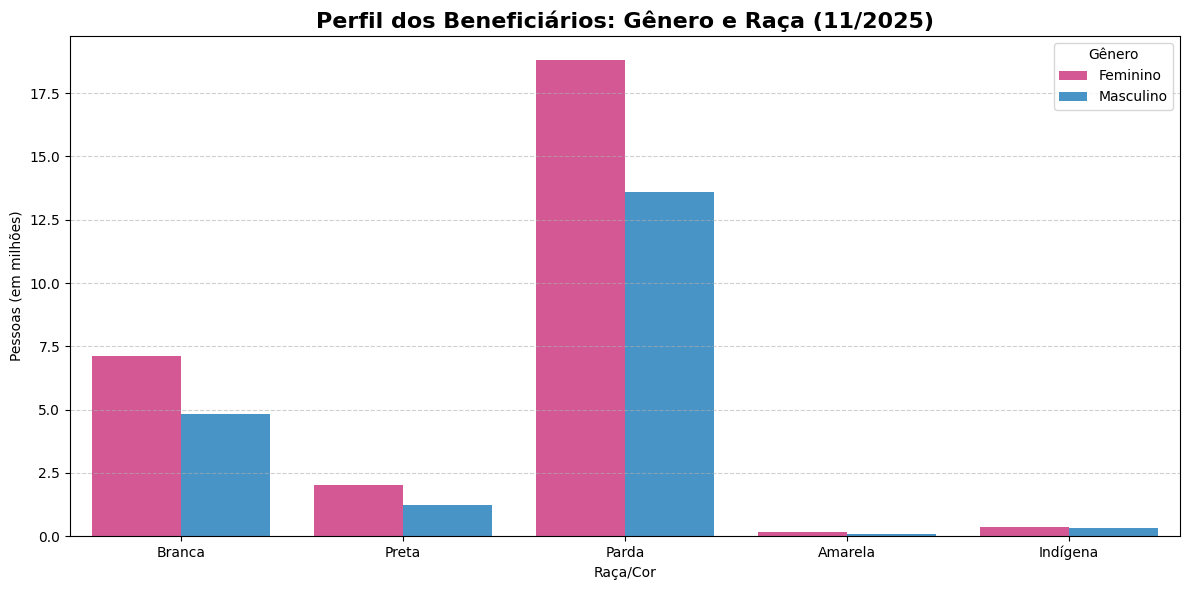

In [30]:
# Função de carga que já resolve os problemas que tivemos antes
def carregar_e_limpar(caminho):
    df = pd.read_csv(caminho, sep=',', encoding='latin-1')
    df.columns = df.columns.str.replace('"', '').str.strip()
    df.rename(columns={df.columns[0]: 'Referência'}, inplace=True)
    df['Referência'] = pd.to_datetime(df['Referência'], format='%m/%Y', errors='coerce')
    return df.dropna(subset=['Referência']).sort_values('Referência')

# Carregar os dois arquivos
df_masc = carregar_e_limpar('/content/drive/MyDrive/Colab/bolsaFamilia/bolsFamilia_SexMasc.csv')
df_fem = carregar_e_limpar('/content/drive/MyDrive/Colab/bolsaFamilia/BolsaFamilia_SexFem.csv')

# Pegar o mês mais recente disponível em ambos para uma "foto" do momento
data_recente = df_fem['Referência'].max()
dados_f = df_fem[df_fem['Referência'] == data_recente].iloc[0]
dados_m = df_masc[df_masc['Referência'] == data_recente].iloc[0]

# Organizar os dados para o gráfico
racas = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
# Pegamos as colunas 1 a 5 (Branca até Indígena)
valores_f = [dados_f[1], dados_f[2], dados_f[3], dados_f[4], dados_f[5]]
valores_m = [dados_m[1], dados_m[2], dados_m[3], dados_m[4], dados_m[5]]

# Criar um DataFrame auxiliar para plotagem
df_perfil = pd.DataFrame({
    'Raça/Cor': racas * 2,
    'Gênero': ['Feminino'] * 5 + ['Masculino'] * 5,
    'Quantidade (Milhões)': (valores_f + valores_m)
})

# Converter para milhões para facilitar a leitura
df_perfil['Quantidade (Milhões)'] = df_perfil['Quantidade (Milhões)'] / 1_000_000

# Gerar o Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_perfil, x='Raça/Cor', y='Quantidade (Milhões)', hue='Gênero', palette=['#e84393', '#3498db'])

plt.title(f'Perfil dos Beneficiários: Gênero e Raça ({data_recente.strftime("%m/%Y")})', fontsize=16, fontweight='bold')
plt.ylabel('Pessoas (em milhões)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**A Feminização da Pobreza:** O gráfico mostra que em todas as categorias raciais, as mulheres são a maioria esmagadora. Isso prova que o Bolsa Família é, na prática, uma política de emancipação e suporte feminino, combatendo a vulnerabilidade das mães solo.

**O Fator Racial:** A barra de pessoas Pardas é a maior de todas, seguida pela de pessoas Brancas e Pretas. Historicamente, isso reflete a estrutura da pirâmide social brasileira, onde a população negra (pretos e pardos) é a que mais sofre com a falta de acesso a renda formal.